In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import logging
logging.getLogger("tensorflow").disabled = True

In [4]:
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.compat.v2.config.experimental.set_memory_growth(gpu, True)

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-04),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = "data/kaggle_pets/train/"
validation_dir = "data/kaggle_pets/val/"
test_dir = "data/kaggle_pets/test/"

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    class_mode="binary",
                                                    batch_size=50)

Found 17500 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        class_mode="binary",
                                                        batch_size=50)

Found 2500 images belonging to 2 classes.


In [11]:
for data_batch, label_batch in train_generator:
    d = data_batch
    l = label_batch
    break

In [12]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              steps_per_epoch=350,
                              validation_data=validation_generator,
                              validation_steps=50,
                              workers=16,
                              max_queue_size=128)

Epoch 1/30
350/350 [==============================] - 21s 61ms/step - loss: 0.6415 - accuracy: 0.6098 - val_loss: 0.5721 - val_accuracy: 0.7000
Epoch 2/30
350/350 [==============================] - 18s 50ms/step - loss: 0.5409 - accuracy: 0.7265 - val_loss: 0.4849 - val_accuracy: 0.7708
Epoch 3/30
350/350 [==============================] - 17s 49ms/step - loss: 0.4908 - accuracy: 0.7615 - val_loss: 0.4530 - val_accuracy: 0.7944
Epoch 4/30
350/350 [==============================] - 18s 50ms/step - loss: 0.4533 - accuracy: 0.7870 - val_loss: 0.4220 - val_accuracy: 0.7956
Epoch 5/30
350/350 [==============================] - 17s 50ms/step - loss: 0.4222 - accuracy: 0.8064 - val_loss: 0.3945 - val_accuracy: 0.8052
Epoch 6/30
350/350 [==============================] - 17s 50ms/step - loss: 0.3957 - accuracy: 0.8261 - val_loss: 0.4894 - val_accuracy: 0.7664
Epoch 7/30
350/350 [==============================] - 17s 49ms/step - loss: 0.3709 - accuracy: 0.8358 - val_loss: 0.3666 - val_accuracy:

In [13]:
model.save("cats_and_dogs_1.h5")

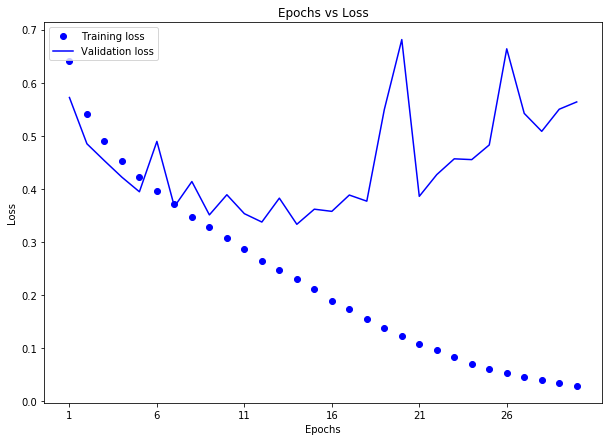

In [17]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(history.history["accuracy"])+1)

plt.figure(figsize=(10,7))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(min(epochs),max(epochs)+1,5))
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.legend()

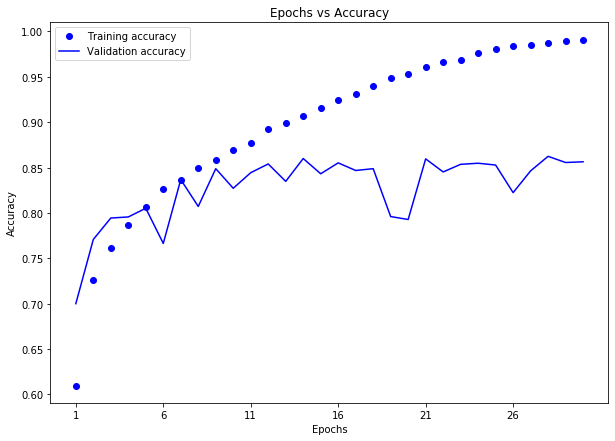

In [18]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(history.history["accuracy"])+1)

plt.figure(figsize=(10,7))
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(min(epochs),max(epochs)+1,5))
plt.plot(epochs,acc,"bo",label="Training accuracy")
plt.plot(epochs,val_acc,"b",label="Validation accuracy")
plt.legend()

In [30]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(512,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [31]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-04),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [32]:
train_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size=(150,150),
                                                class_mode="binary",
                                                batch_size=50)
validation_generator = test_gen.flow_from_directory(validation_dir,
                                                    target_size=(150,150),
                                                    class_mode="binary",
                                                    batch_size=50)

Found 17500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [34]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=350,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50,
                              workers=16,
                              max_queue_size=128)

Epoch 1/100
350/350 [==============================] - 29s 82ms/step - loss: 0.6722 - accuracy: 0.5751 - val_loss: 0.7311 - val_accuracy: 0.5120
Epoch 2/100
350/350 [==============================] - 27s 77ms/step - loss: 0.6298 - accuracy: 0.6403 - val_loss: 0.6056 - val_accuracy: 0.6592
Epoch 3/100
350/350 [==============================] - 27s 77ms/step - loss: 0.6025 - accuracy: 0.6709 - val_loss: 0.5307 - val_accuracy: 0.7380
Epoch 4/100
350/350 [==============================] - 27s 77ms/step - loss: 0.5804 - accuracy: 0.6841 - val_loss: 0.5229 - val_accuracy: 0.7452
Epoch 5/100
350/350 [==============================] - 27s 77ms/step - loss: 0.5651 - accuracy: 0.7026 - val_loss: 0.4998 - val_accuracy: 0.7700
Epoch 6/100
350/350 [==============================] - 27s 77ms/step - loss: 0.5471 - accuracy: 0.7201 - val_loss: 0.4910 - val_accuracy: 0.7760
Epoch 7/100
350/350 [==============================] - 27s 77ms/step - loss: 0.5371 - accuracy: 0.7279 - val_loss: 0.4646 - val_ac

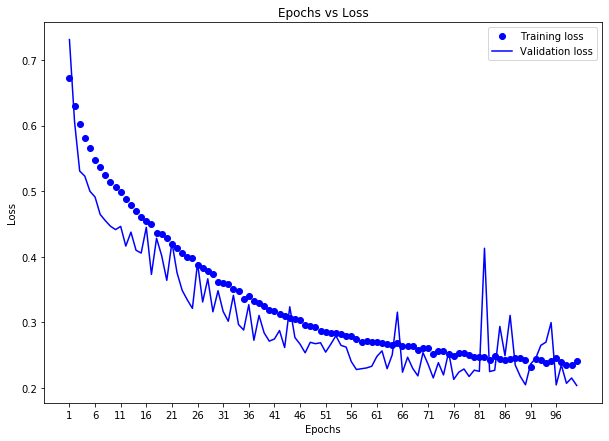

In [35]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(history.history["accuracy"])+1)

plt.figure(figsize=(10,7))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(min(epochs),max(epochs)+1,5))
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.legend()

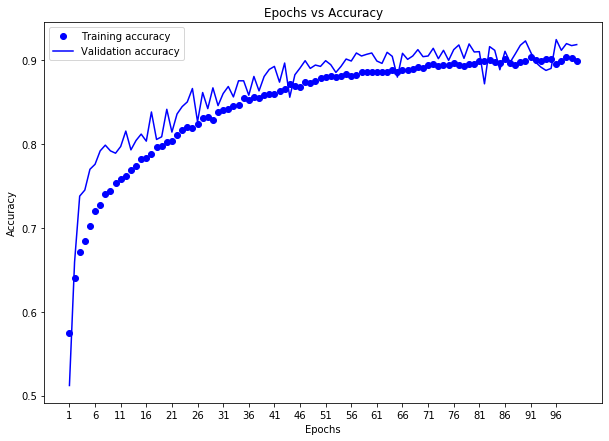

In [36]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(history.history["accuracy"])+1)

plt.figure(figsize=(10,7))
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(min(epochs),max(epochs)+1,5))
plt.plot(epochs,acc,"bo",label="Training accuracy")
plt.plot(epochs,val_acc,"b",label="Validation accuracy")
plt.legend()